In [6]:
import pandas as pd



df = pd.read_csv("./mock_data.csv")

df.describe()

,age,duree_vie_prevue,frequence_maintenance,nb_pannes,temps_fonctionnement_total,temps_moyen_reparation,temps_arret_panne
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.922000,12.897000,46.08800,23.989000,29390.620000,9.932000,25.097000
std,3.154341,1.976942,25.89975,11.147517,11702.604358,4.833916,13.496583
min,3.000000,10.000000,1.00000,6.000000,11130.000000,2.000000,2.000000
25%,5.000000,11.000000,23.00000,15.000000,18550.000000,6.000000,14.000000
50%,8.000000,13.000000,47.00000,23.000000,29680.000000,10.000000,25.000000
75%,11.000000,15.000000,68.00000,32.000000,40810.000000,14.000000,37.000000
max,13.000000,16.000000,90.00000,52.000000,48230.000000,18.000000,48.000000


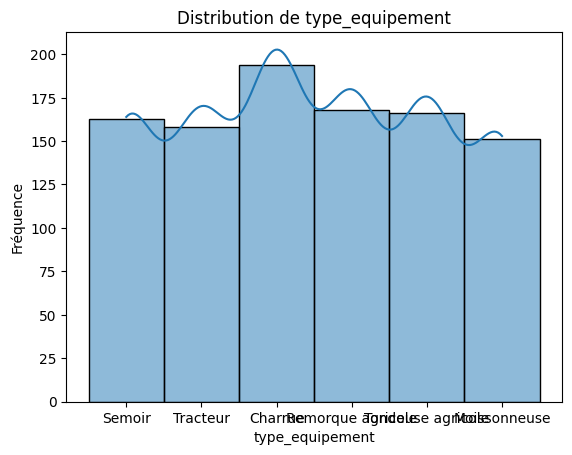

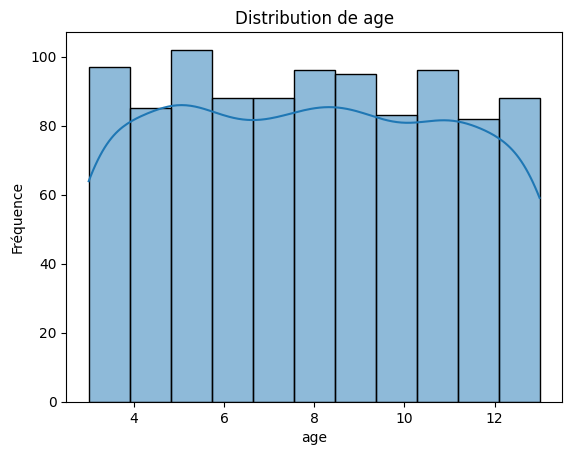

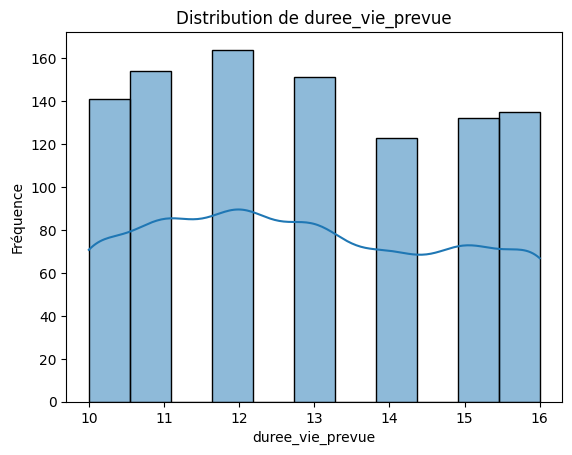

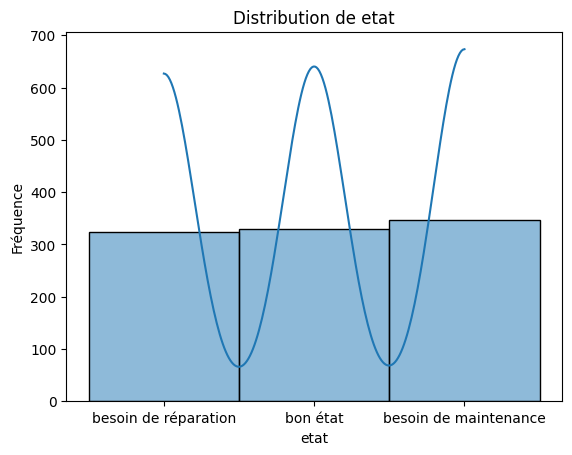

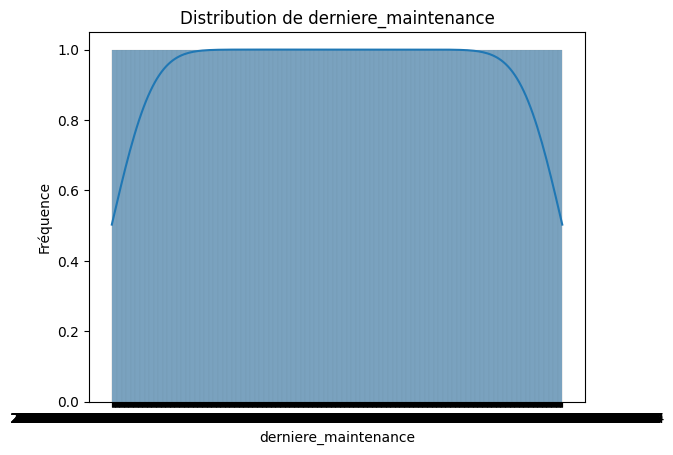

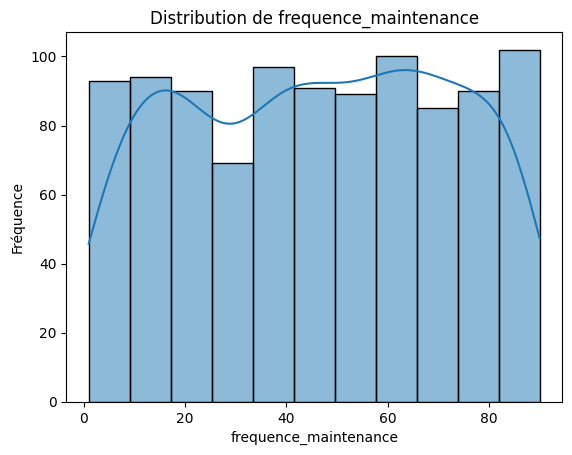

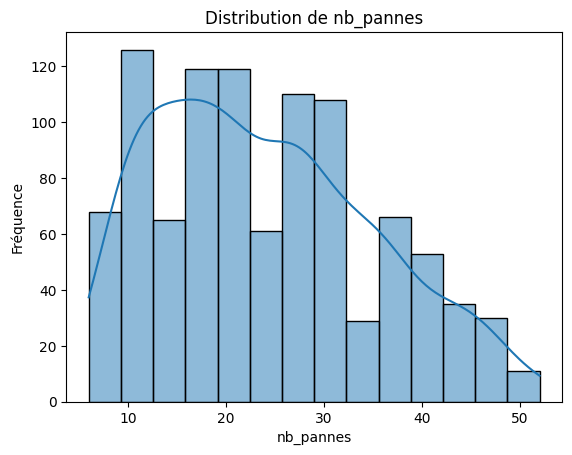

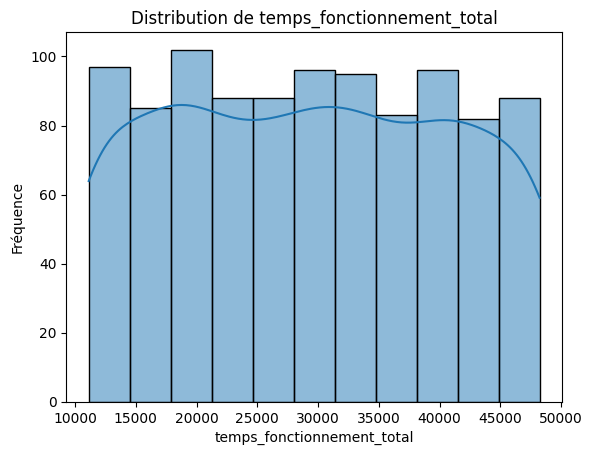

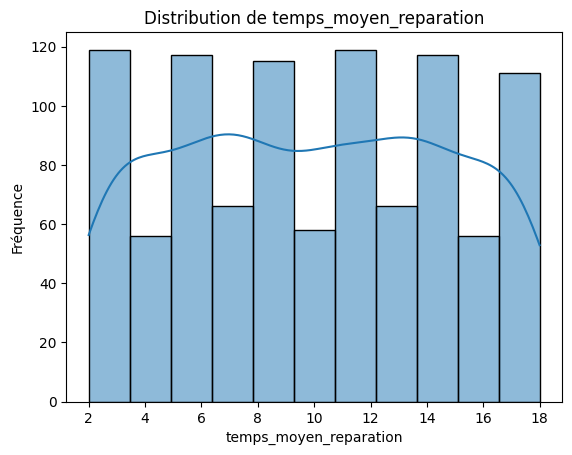

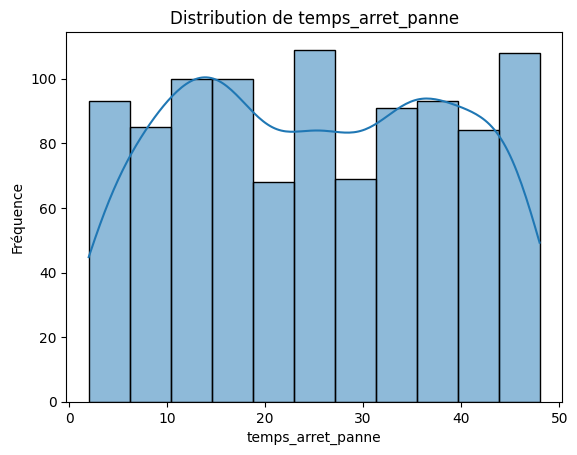

In [9]:
features = df.columns[:-1].tolist()

import seaborn as sns
import matplotlib.pyplot as plt

for var in features:
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.show()

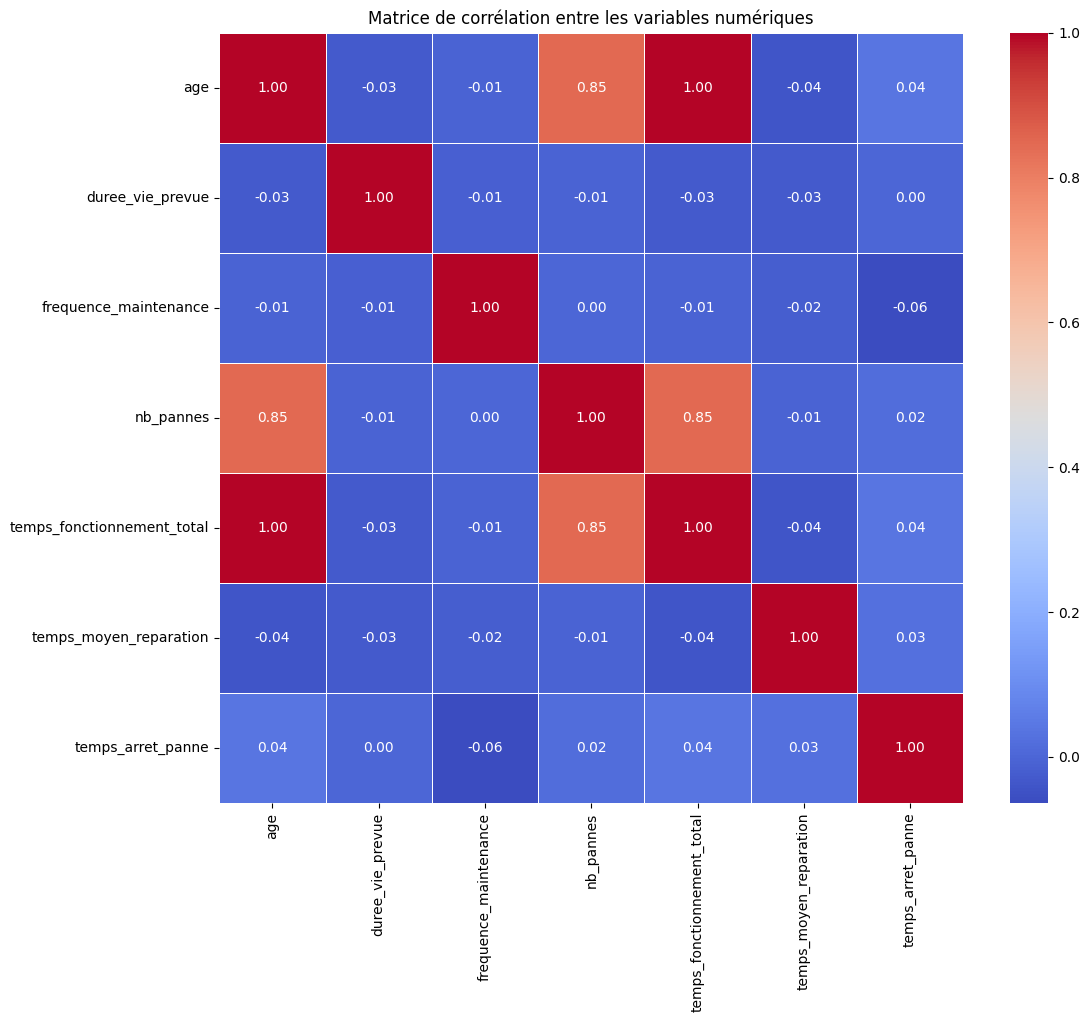

In [13]:
feathers_db = df[features]

numerical_features = feathers_db.select_dtypes(include=['float64', 'int64'])
numerical_features.corr()

correlation = numerical_features.corr()

# Afficher la matrice de corrélation dans un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()


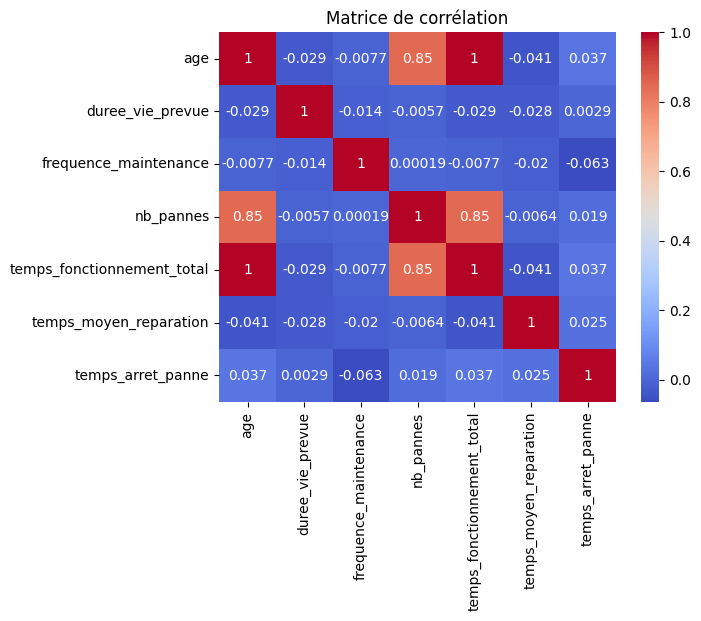

In [15]:
corr_matrix = numerical_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

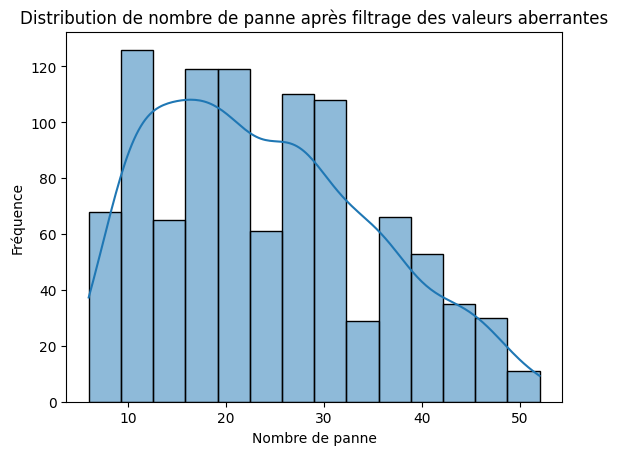

In [16]:
col_aberrante = "nb_pannes"

Q1 = df[col_aberrante].quantile(0.25)
Q3 = df[col_aberrante].quantile(0.75)
IQR = Q3 - Q1

seuil_inf = Q1 - 1.5 * IQR
seuil_sup = Q3 + 1.5 * IQR

df_filtré = df[(df[col_aberrante] >= seuil_inf) & (df[col_aberrante] <= seuil_sup)]

sns.histplot(df_filtré[col_aberrante], kde=True)
plt.title('Distribution de nombre de panne après filtrage des valeurs aberrantes')
plt.xlabel('Nombre de panne')
plt.ylabel('Fréquence')
plt.show()


In [19]:
x = numerical_features
y = df["class_equipement"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(max_depth=3, random_state=42)
_ = model.fit(x_train, y_train)

In [37]:
predictions = model.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.905
Confusion Matrix:
 [[  2   7   0]
 [  1 114   3]
 [  0   8  65]]
Classification Report:
               precision    recall  f1-score   support

           A       0.67      0.22      0.33         9
           B       0.88      0.97      0.92       118
           C       0.96      0.89      0.92        73

    accuracy                           0.91       200
   macro avg       0.84      0.69      0.73       200
weighted avg       0.90      0.91      0.90       200



Accuracy of Decision Tree classifier on test set: 0.91
Classes are ['A' 'B' 'C'] and features are Index(['age', 'duree_vie_prevue', 'frequence_maintenance', 'nb_pannes',
       'temps_fonctionnement_total', 'temps_moyen_reparation',
       'temps_arret_panne'],
      dtype='object')


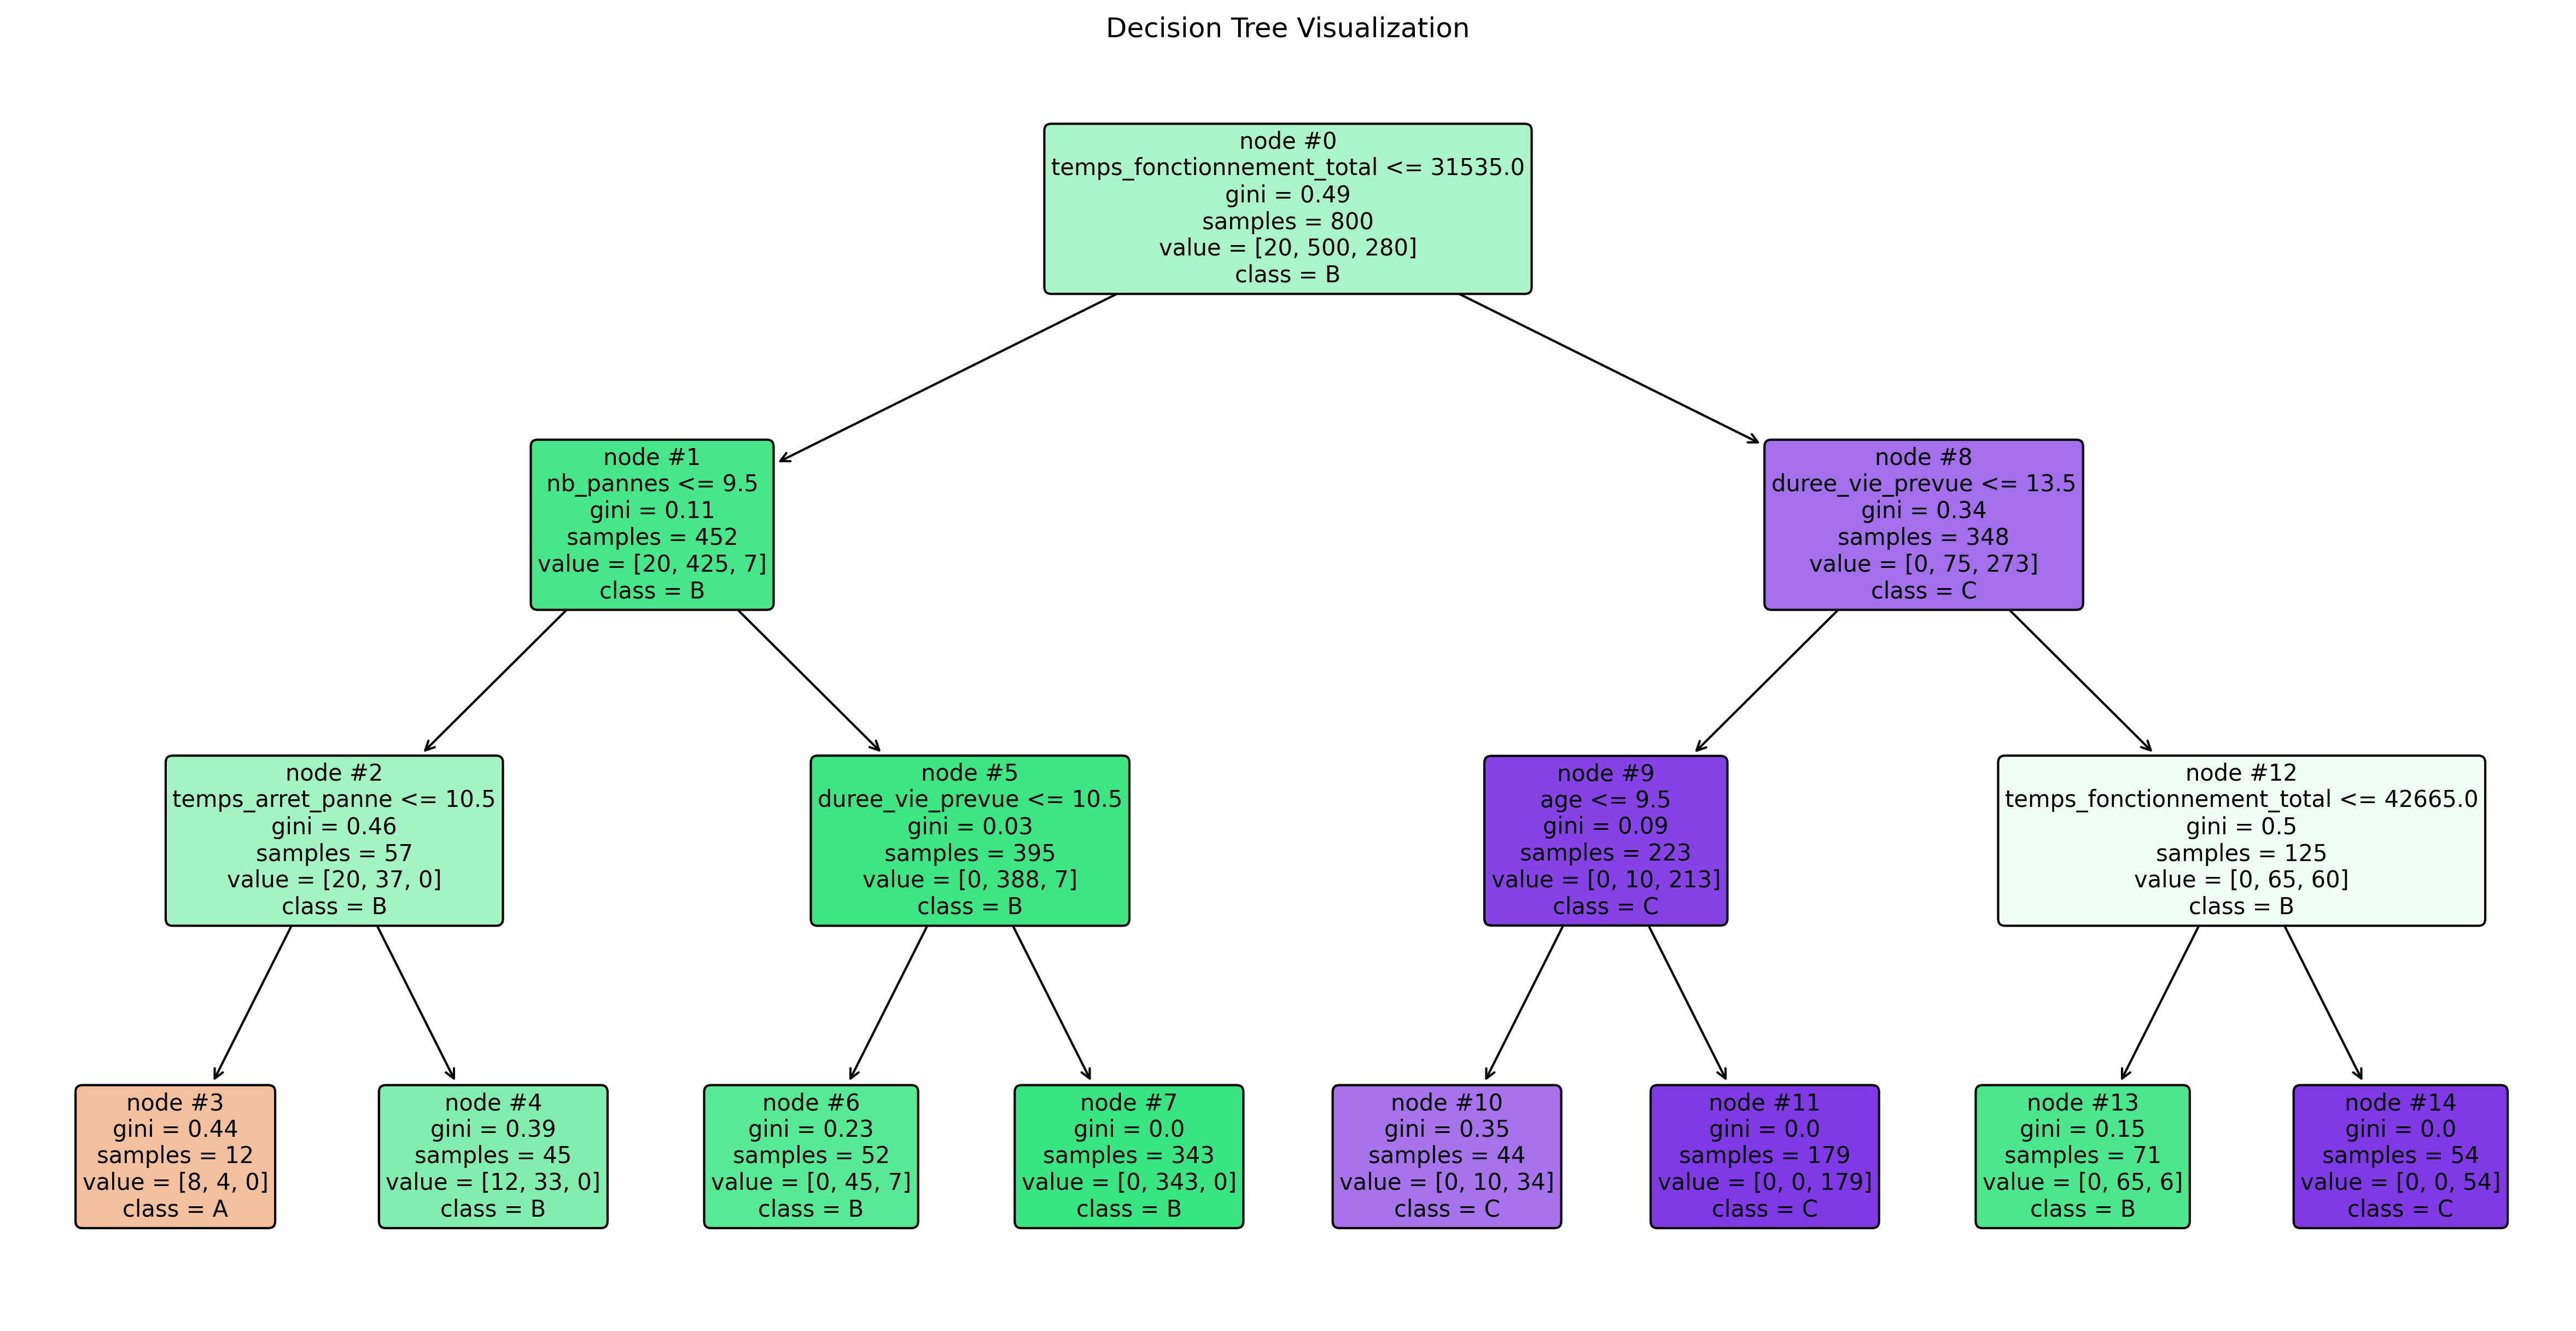

In [58]:
score = model.score(x_test, y_test)
print(f"Accuracy of Decision Tree classifier on test set: {score:.2f}")

features = x.columns

print(f"Classes are {model.classes_} and features are {features}")
plt.figure(figsize=(20, 10), dpi=300)  # Large figure size and high resolution
decision_tree = plot_tree(
    model,
    feature_names=features,
    class_names=model.classes_,
    filled=True,  # Color nodes by class
    rounded=True,  # Rounded corners in nodes
    fontsize=10,  # Adjust fontsize for readability
    proportion=False,  # Display the proportion of each class in nodes
    precision=2,  # Limit the number of decimal places for better readability
    node_ids=True
)

plt.title('Decision Tree Visualization')  # Title for the plot
plt.show()

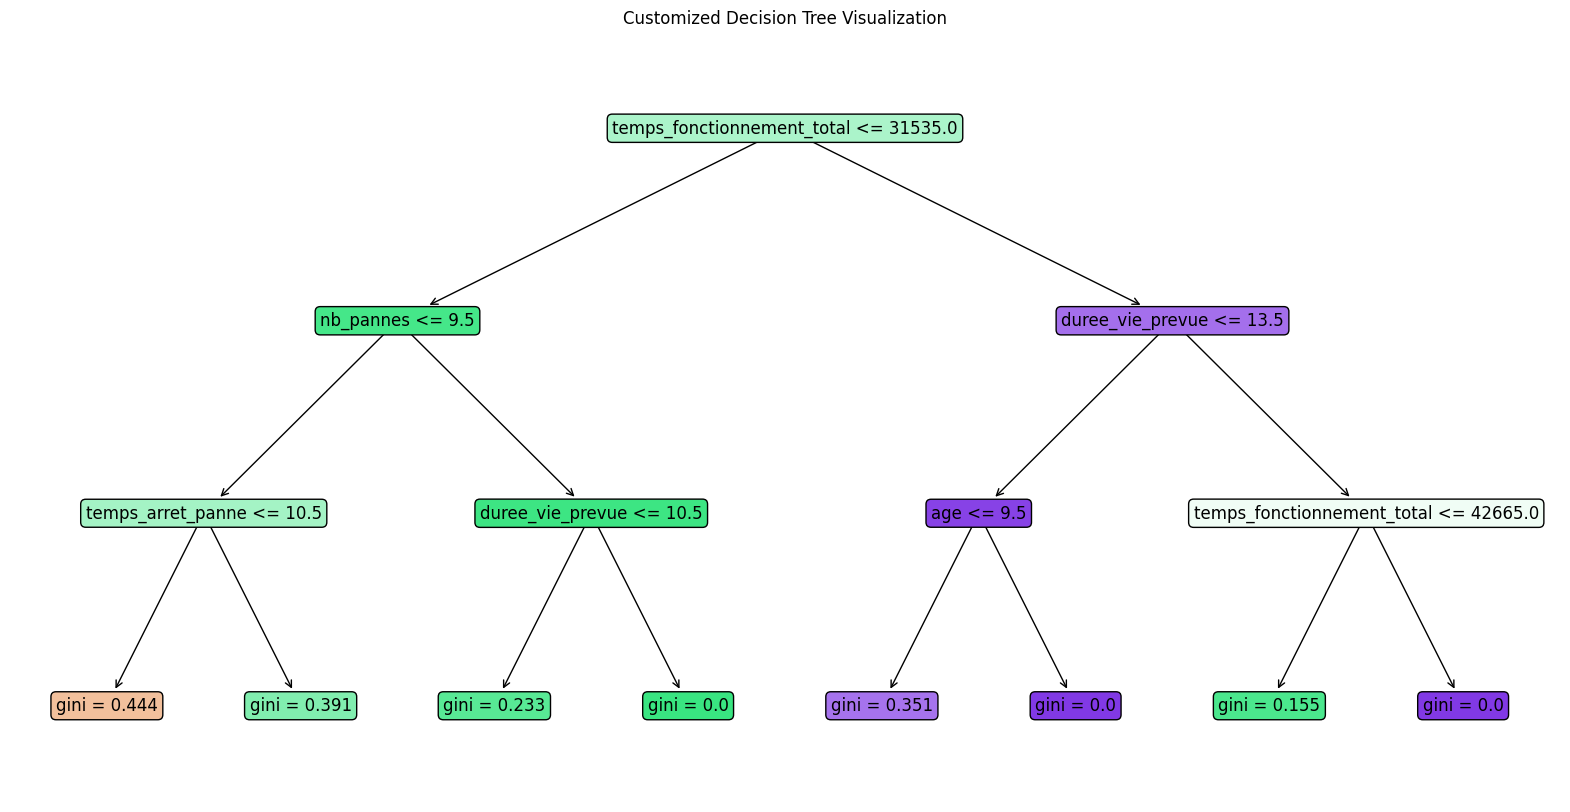

In [61]:
fig, ax = plt.figure(figsize=(20, 10)), plt.gca()
decision_tree = plot_tree(
    model,
    feature_names=features,
    class_names=model.classes_,
    filled=True,
    rounded=True,
    fontsize=12,
    node_ids=False,
)

# Customize node texts
for o in ax.texts:
    # Example text: 'node #0\nentropy = 0.65\nsamples = 100\nvalue = [50, 50]\nclass = setosa'
    if 'leaf' in o.get_text():
        # Leaf node: Change text to only show class name
        lines = o.get_text().split('\n')
        for line in lines:
            if 'class' in line:
                class_name = line.split('=')[1].strip()
                o.set_text(class_name)
    else:
        # Non-leaf node: Only keep the condition
        lines = o.get_text().split('\n')
        condition = lines[0]
        o.set_text(condition)

plt.title('Customized Decision Tree Visualization')
plt.show()


/Users/johnnakamura/projects/pds3/proto/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/johnnakamura/projects/pds3/proto/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/johnnakamura/projects/pds3/proto/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/johnnakamura/projects/pds3/proto/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/johnnakamura/projects/pds3/proto/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted with

Tree 0 accuracy: 0.00
Tree 1 accuracy: 0.00
Tree 2 accuracy: 0.00
Tree 3 accuracy: 0.00
Tree 4 accuracy: 0.00
Tree 5 accuracy: 0.00
Tree 6 accuracy: 0.00
Tree 7 accuracy: 0.00
Tree 8 accuracy: 0.00
Tree 9 accuracy: 0.00
Best Tree Index: 0, Accuracy: 0.00
Worst Tree Index: 0, Accuracy: 0.00


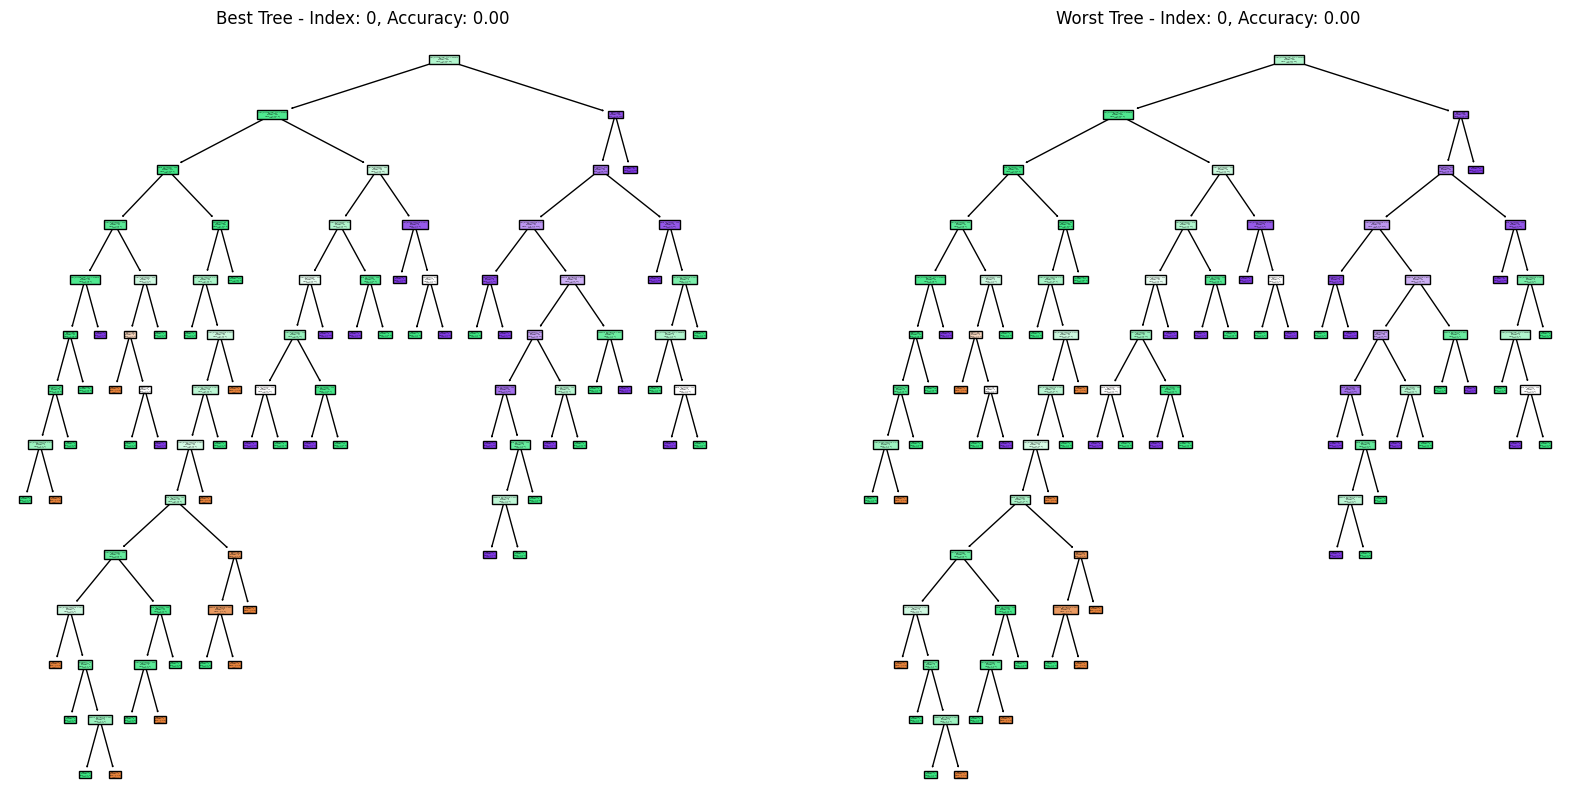

In [62]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(x_train, y_train)

# Evaluate each individual tree
accuracies = []
for idx, tree in enumerate(rf.estimators_):
    # Predictions of the current tree
    y_pred = tree.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Tree {idx} accuracy: {accuracy:.2f}")

# Identify the best and worst tree
max_index = np.argmax(accuracies)
min_index = np.argmin(accuracies)
print(f"Best Tree Index: {max_index}, Accuracy: {accuracies[max_index]:.2f}")
print(f"Worst Tree Index: {min_index}, Accuracy: {accuracies[min_index]:.2f}")

# Visualize the best and worst tree
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
plot_tree(rf.estimators_[max_index], ax=axes[0], filled=True, feature_names=features, class_names=model.classes_)
axes[0].set_title(f'Best Tree - Index: {max_index}, Accuracy: {accuracies[max_index]:.2f}')

plot_tree(rf.estimators_[min_index], ax=axes[1], filled=True, feature_names=features, class_names=model.classes_)
axes[1].set_title(f'Worst Tree - Index: {min_index}, Accuracy: {accuracies[min_index]:.2f}')

plt.show()
